### CIC is looking for you to make suggestions about potential “rules” that they could implement with Jornaya data to positively impact their lead-buying strategy. For example, these are some good questions and points to start with:
- Based on the data available, is there a certain type of lead that CIC should not bother purchasing?
- Are there consumers that CIC should prioritize purchase and trying to contact? 
- What are the characteristics of the leads that CIC should not and should prioritize purchasing, and how can they implement rules using Jornaya data to distinguish these leads?
- How much of a difference does having Jornaya data available make vs. not having it available?
- Remember we are aiming to prove Jornaya’s data can have a meaningful and valuable impact to CIC, so showing numbers for how these rules can affect CIC will increase the strength of your story.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

import wrangle

In [2]:
df = pd.read_csv('clean_CIC.csv').set_index('token')

In [3]:
df.head()

,provider,lead_cost,contact,purchase,lead_age,lead_duration,field_count,competitors,provider_a,provider_b,provider_c,provider_d
token,,,,,,,,,,,,
1,C,50,0,0,74,962,10,2,0,0,1,0
2,C,50,0,0,47,617,9,3,0,0,1,0
3,A,75,0,0,7,94,14,1,1,0,0,0
4,C,75,0,0,29,104,15,1,0,0,1,0
5,D,75,0,0,27,82,9,1,0,0,0,1


___

## Make more dummies to explore with

### Lead cost

In [4]:
# dummy lead cost feature
dummy_df =  pd.get_dummies(df['lead_cost'])
# name the new columns (goes in order of value counts high to low)
dummy_df.columns = ['lead_costs_25', 'lead_costs_50', 
                    'lead_costs_75', 'lead_costs_100']
# concat the dummies to the main data frame
df = pd.concat([df, dummy_df], axis=1)

### Competitors

In [5]:
# dummy competitors feature
dummy_df =  pd.get_dummies(df['competitors'])
# name the new columns (goes in order of value counts high to low)
dummy_df.columns = ['competitors_0', 'competitors_1', 
                    'competitors_2', 'competitors_3']
# concat the dummies to the main data frame
df = pd.concat([df, dummy_df], axis=1)

___

## Split the data

In [6]:
train, validate, test = wrangle.split_CIC(df)
X_train, X_validate, X_test, y_train, y_validate, y_test = wrangle.split_train_validate_test(train, validate, test) 
train_scaled, validate_scaled, test_scaled = wrangle.scale_my_data(train, validate, test)

___

- Dont contact leads that took longer than 30 seconds to send to CIC
- Dont purchase leads that took longer than 1k seconds to complete the form.
- Do not purchase any leads at the 50 price point from provider B or C
- Do not purchase any leads at the 75 price point from provider B.
- Do not purchase any leads at the 100 price point from provider B.

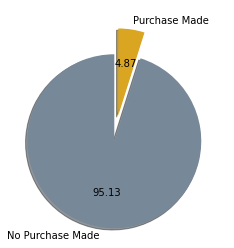

In [7]:
explode = (0.3, 0)  
colors = ['lightslategrey','goldenrod']

plt.pie(df['purchase'].value_counts(), 
        startangle=90, autopct='%.2f',
        labels=['No Purchase Made', 'Purchase Made'], shadow=True,
        explode=explode, colors=colors)
plt.show()

In [8]:
df = df[df.lead_age < 30]

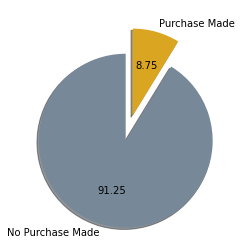

In [9]:
explode = (0.3, 0)  
colors = ['lightslategrey','goldenrod']

plt.pie(df['purchase'].value_counts(), 
        startangle=90, autopct='%.2f',
        labels=['No Purchase Made', 'Purchase Made'], shadow=True,
        explode=explode, colors=colors)
plt.show()

In [10]:
df = df[df.lead_duration < 1000]

In [11]:
(df.purchase == 1).sum()

25

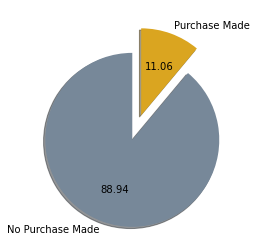

In [12]:
explode = (0.3, 0)  
colors = ['lightslategrey','goldenrod']

plt.pie(df['purchase'].value_counts(), 
        startangle=90, autopct='%.2f',
        labels=['No Purchase Made', 'Purchase Made'], shadow=True,
        explode=explode, colors=colors)
plt.show()

In [13]:
df = df.drop(df[(df.provider == 'B') & (df.lead_cost == 50)].index)

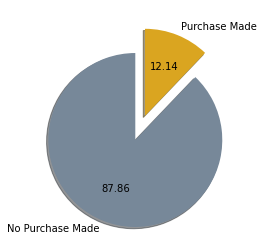

In [14]:
explode = (0.3, 0)  
colors = ['lightslategrey','goldenrod']

plt.pie(df['purchase'].value_counts(), 
        startangle=90, autopct='%.2f',
        labels=['No Purchase Made', 'Purchase Made'], shadow=True,
        explode=explode, colors=colors)
plt.show()

In [15]:
df = df.drop(df[(df.provider == 'B') & (df.lead_cost == 75)].index)

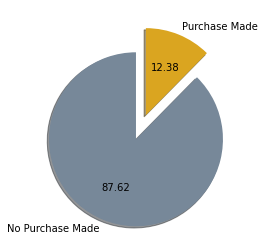

In [16]:
explode = (0.3, 0)  
colors = ['lightslategrey','goldenrod']

plt.pie(df['purchase'].value_counts(), 
        startangle=90, autopct='%.2f',
        labels=['No Purchase Made', 'Purchase Made'], shadow=True,
        explode=explode, colors=colors)
plt.show()

In [17]:
df = df.drop(df[(df.provider == 'B') & (df.lead_cost == 100)].index)

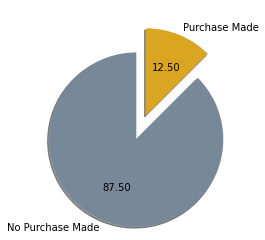

In [18]:
explode = (0.3, 0)  
colors = ['lightslategrey','goldenrod']

plt.pie(df['purchase'].value_counts(), 
        startangle=90, autopct='%.2f',
        labels=['No Purchase Made', 'Purchase Made'], shadow=True,
        explode=explode, colors=colors)
plt.show()

In [19]:
df = df.drop(df[(df.provider == 'C') & (df.lead_cost == 50)].index)

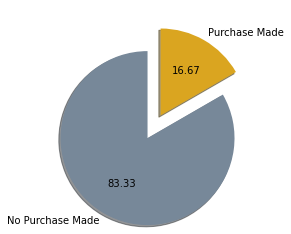

In [20]:
explode = (0.3, 0)  
colors = ['lightslategrey','goldenrod']

plt.pie(df['purchase'].value_counts(), 
        startangle=90, autopct='%.2f',
        labels=['No Purchase Made', 'Purchase Made'], shadow=True,
        explode=explode, colors=colors)
plt.show()

In [21]:
df = df[df.lead_age < 30]

## Takeaways

- If we dont contact leads that have a lead age higher than 30, not purchasing a lead with a duration of over 1000 seconds, not purchase leads costing 50, 75,or 100 from provider B, and not purchase leads costing 50 dollars from lead C; then we can increase our consumer purchase from 4.86% up to 16.67%
    - although this doesnt seem like a big difference it really is. because with a purchase of 16.67% equatees to:
        - 554 x .1667 = 92.35 sales instead of 27 sales CIC currently made in the provided sata set.